In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import TomekLinks,RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.datasets import make_classification

# 데이터 생성: 클래스 불균형 적용
X, y = make_classification(n_samples=5000, n_features=20,
                           n_informative=15, n_redundant=5,
                           weights=[0.90, 0.10], random_state = 333)

# 데이터 분리 (Train / Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 333)

# 클래스 분포 확인
print("🔹 클래스 분포 (훈련 데이터)")
print(pd.Series(y_train).value_counts())
print('\n')

print("🔹 클래스 분포 (테스트 데이터)")
print(pd.Series(y_test).value_counts())


🔹 클래스 분포 (훈련 데이터)
0    3576
1     424
Name: count, dtype: int64


🔹 클래스 분포 (테스트 데이터)
0    907
1     93
Name: count, dtype: int64


# Undersampling

<a href="https://ibb.co/bRQsHcgX"><img src="https://i.postimg.cc/N01RJ5Vx/Undersampling.png" alt="Undersampling" border="0"></a>


🔹 Original dataset에 대한 예측모델 F1 score
0.7346938775510204

🔹 Random Undersampling 적용 후 모델 F1 score
0.6778242677824268

🔹 Edited Nearest Neighbours (ENN) 적용 후 모델 F1 score
0.7682119205298014

🔹 Tomek Links 적용 후 모델 성능
0.7432432432432432


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

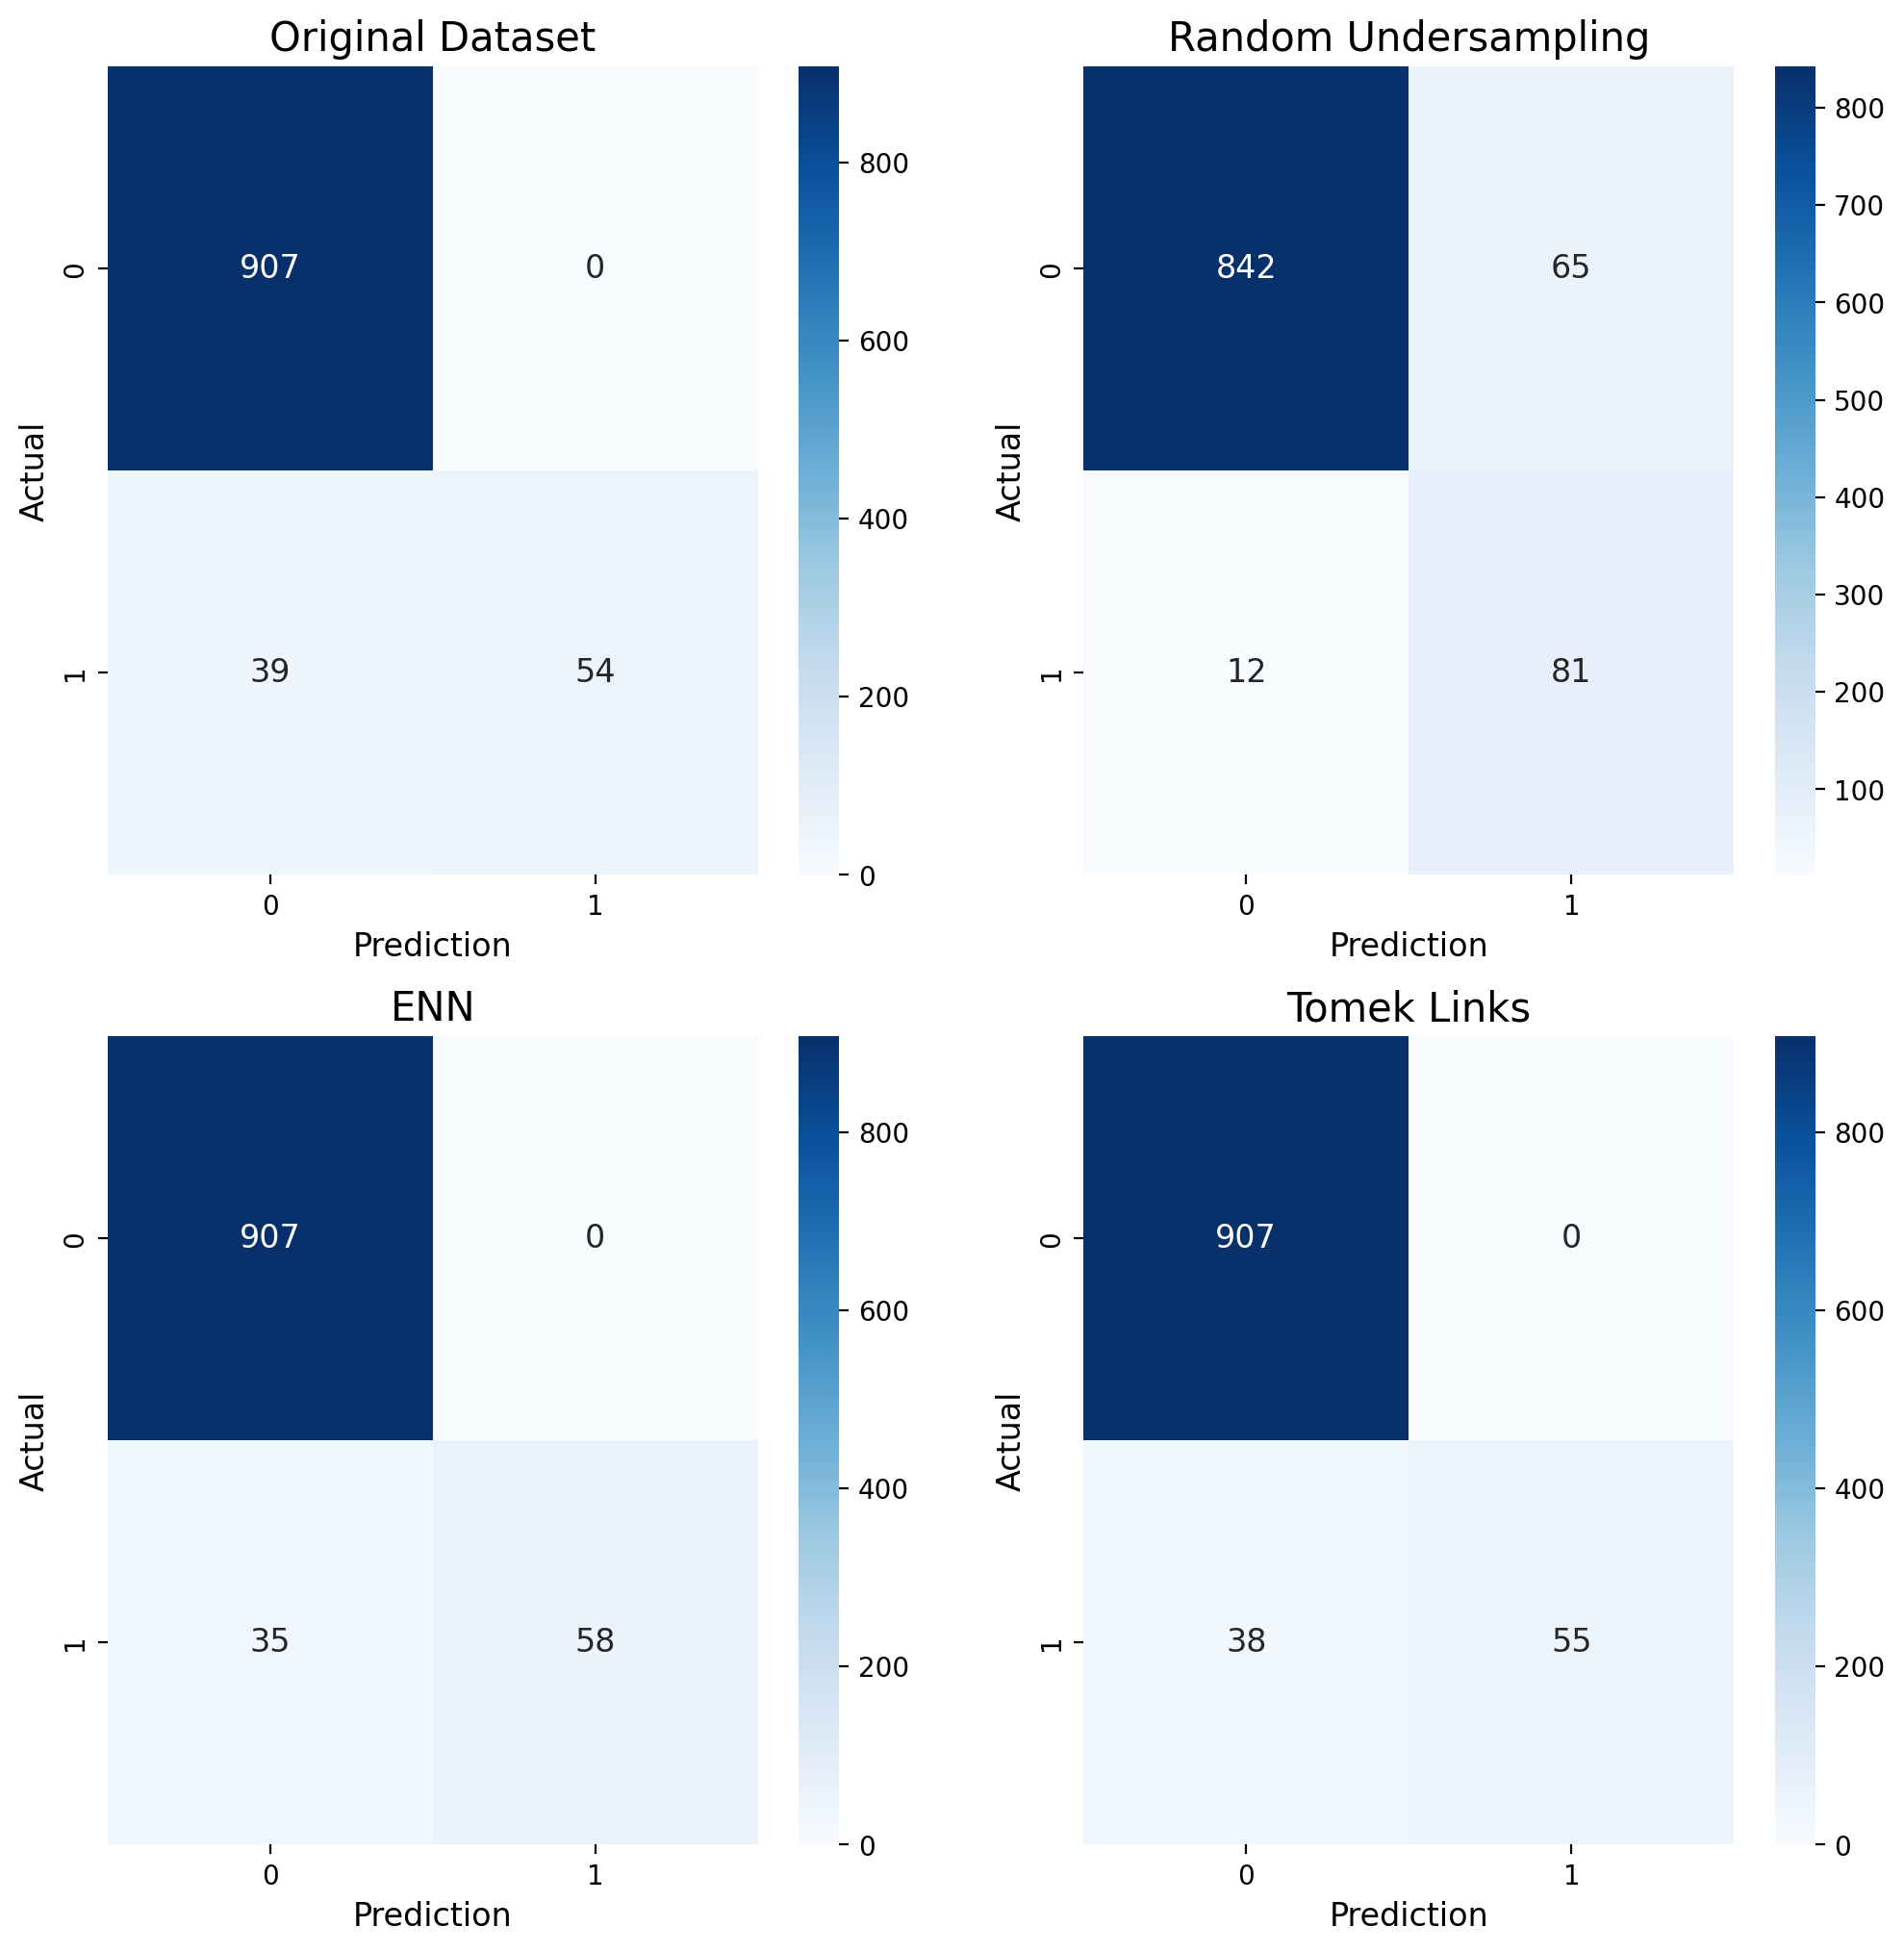

In [2]:
rus = RandomUnderSampler(random_state=333)
enn = EditedNearestNeighbours()
tomek = TomekLinks()

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Original dataset에 대해 학습
clf = RandomForestClassifier(random_state=333)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 다시 학습
clf = RandomForestClassifier(random_state=333)
clf.fit(X_train_rus, y_train_rus)
y_pred_rus = clf.predict(X_test)

clf = RandomForestClassifier(random_state=333)
clf.fit(X_train_enn, y_train_enn)
y_pred_enn = clf.predict(X_test)

clf = RandomForestClassifier(random_state=333)
clf.fit(X_train_tomek, y_train_tomek)
y_pred_tomek = clf.predict(X_test)

print("\n🔹 Original dataset에 대한 예측모델 F1 score")
print(f1_score(y_test, y_pred))

print("\n🔹 Random Undersampling 적용 후 모델 F1 score")
print(f1_score(y_test, y_pred_rus))


print("\n🔹 Edited Nearest Neighbours (ENN) 적용 후 모델 F1 score")
print(f1_score(y_test, y_pred_enn))


print("\n🔹 Tomek Links 적용 후 모델 성능")
print(f1_score(y_test, y_pred_tomek))

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=200)

sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[0][0], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[0][0].set_title("Original Dataset", fontsize=15)
axes[0][0].set_xlabel("Prediction", fontsize=12)
axes[0][0].set_ylabel("Actual", fontsize=12)
axes[0][0].xaxis.set_ticklabels(['0', '1'], size=10)
axes[0][0].yaxis.set_ticklabels(['0', '1'], size=10)

sns.heatmap(confusion_matrix(y_test, y_pred_rus), ax = axes[0][1], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[0][1].set_title("Random Undersampling", fontsize=15)
axes[0][1].set_xlabel("Prediction", fontsize=12)
axes[0][1].set_ylabel("Actual", fontsize=12)
axes[0][1].xaxis.set_ticklabels(['0', '1'], size=10)
axes[0][1].yaxis.set_ticklabels(['0', '1'], size=10)

sns.heatmap(confusion_matrix(y_test, y_pred_enn), ax = axes[1][0], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[1][0].set_title("ENN", fontsize=15)
axes[1][0].set_xlabel("Prediction", fontsize=12)
axes[1][0].set_ylabel("Actual", fontsize=12)
axes[1][0].xaxis.set_ticklabels(['0', '1'], size=10)
axes[1][0].yaxis.set_ticklabels(['0', '1'], size=10)

sns.heatmap(confusion_matrix(y_test, y_pred_tomek), ax = axes[1][1], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[1][1].set_title("Tomek Links", fontsize=15)
axes[1][1].set_xlabel("Prediction", fontsize=12)
axes[1][1].set_ylabel("Actual", fontsize=12)
axes[1][1].xaxis.set_ticklabels(['0', '1'], size=10)
axes[1][1].yaxis.set_ticklabels(['0', '1'], size=10)

# Oversampling

<a href="https://ibb.co/bRQsHcgX"><img src="https://i.postimg.cc/Rhq6BFPy/Oversampling.png" alt="Oversampling" border="0"></a>


🔹 Original dataset에 대한 예측모델 F1 score
0.7346938775510204

🔹 Random Oversampling 적용 후 모델 F1 score
0.75

🔹 Sythetic Minority Oversampling Technique (SMOTE) 적용 후 모델 F1 score
0.8117647058823529

🔹 Adaptive Synthetic Sampling 적용 후 모델 F1 score
0.783625730994152


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

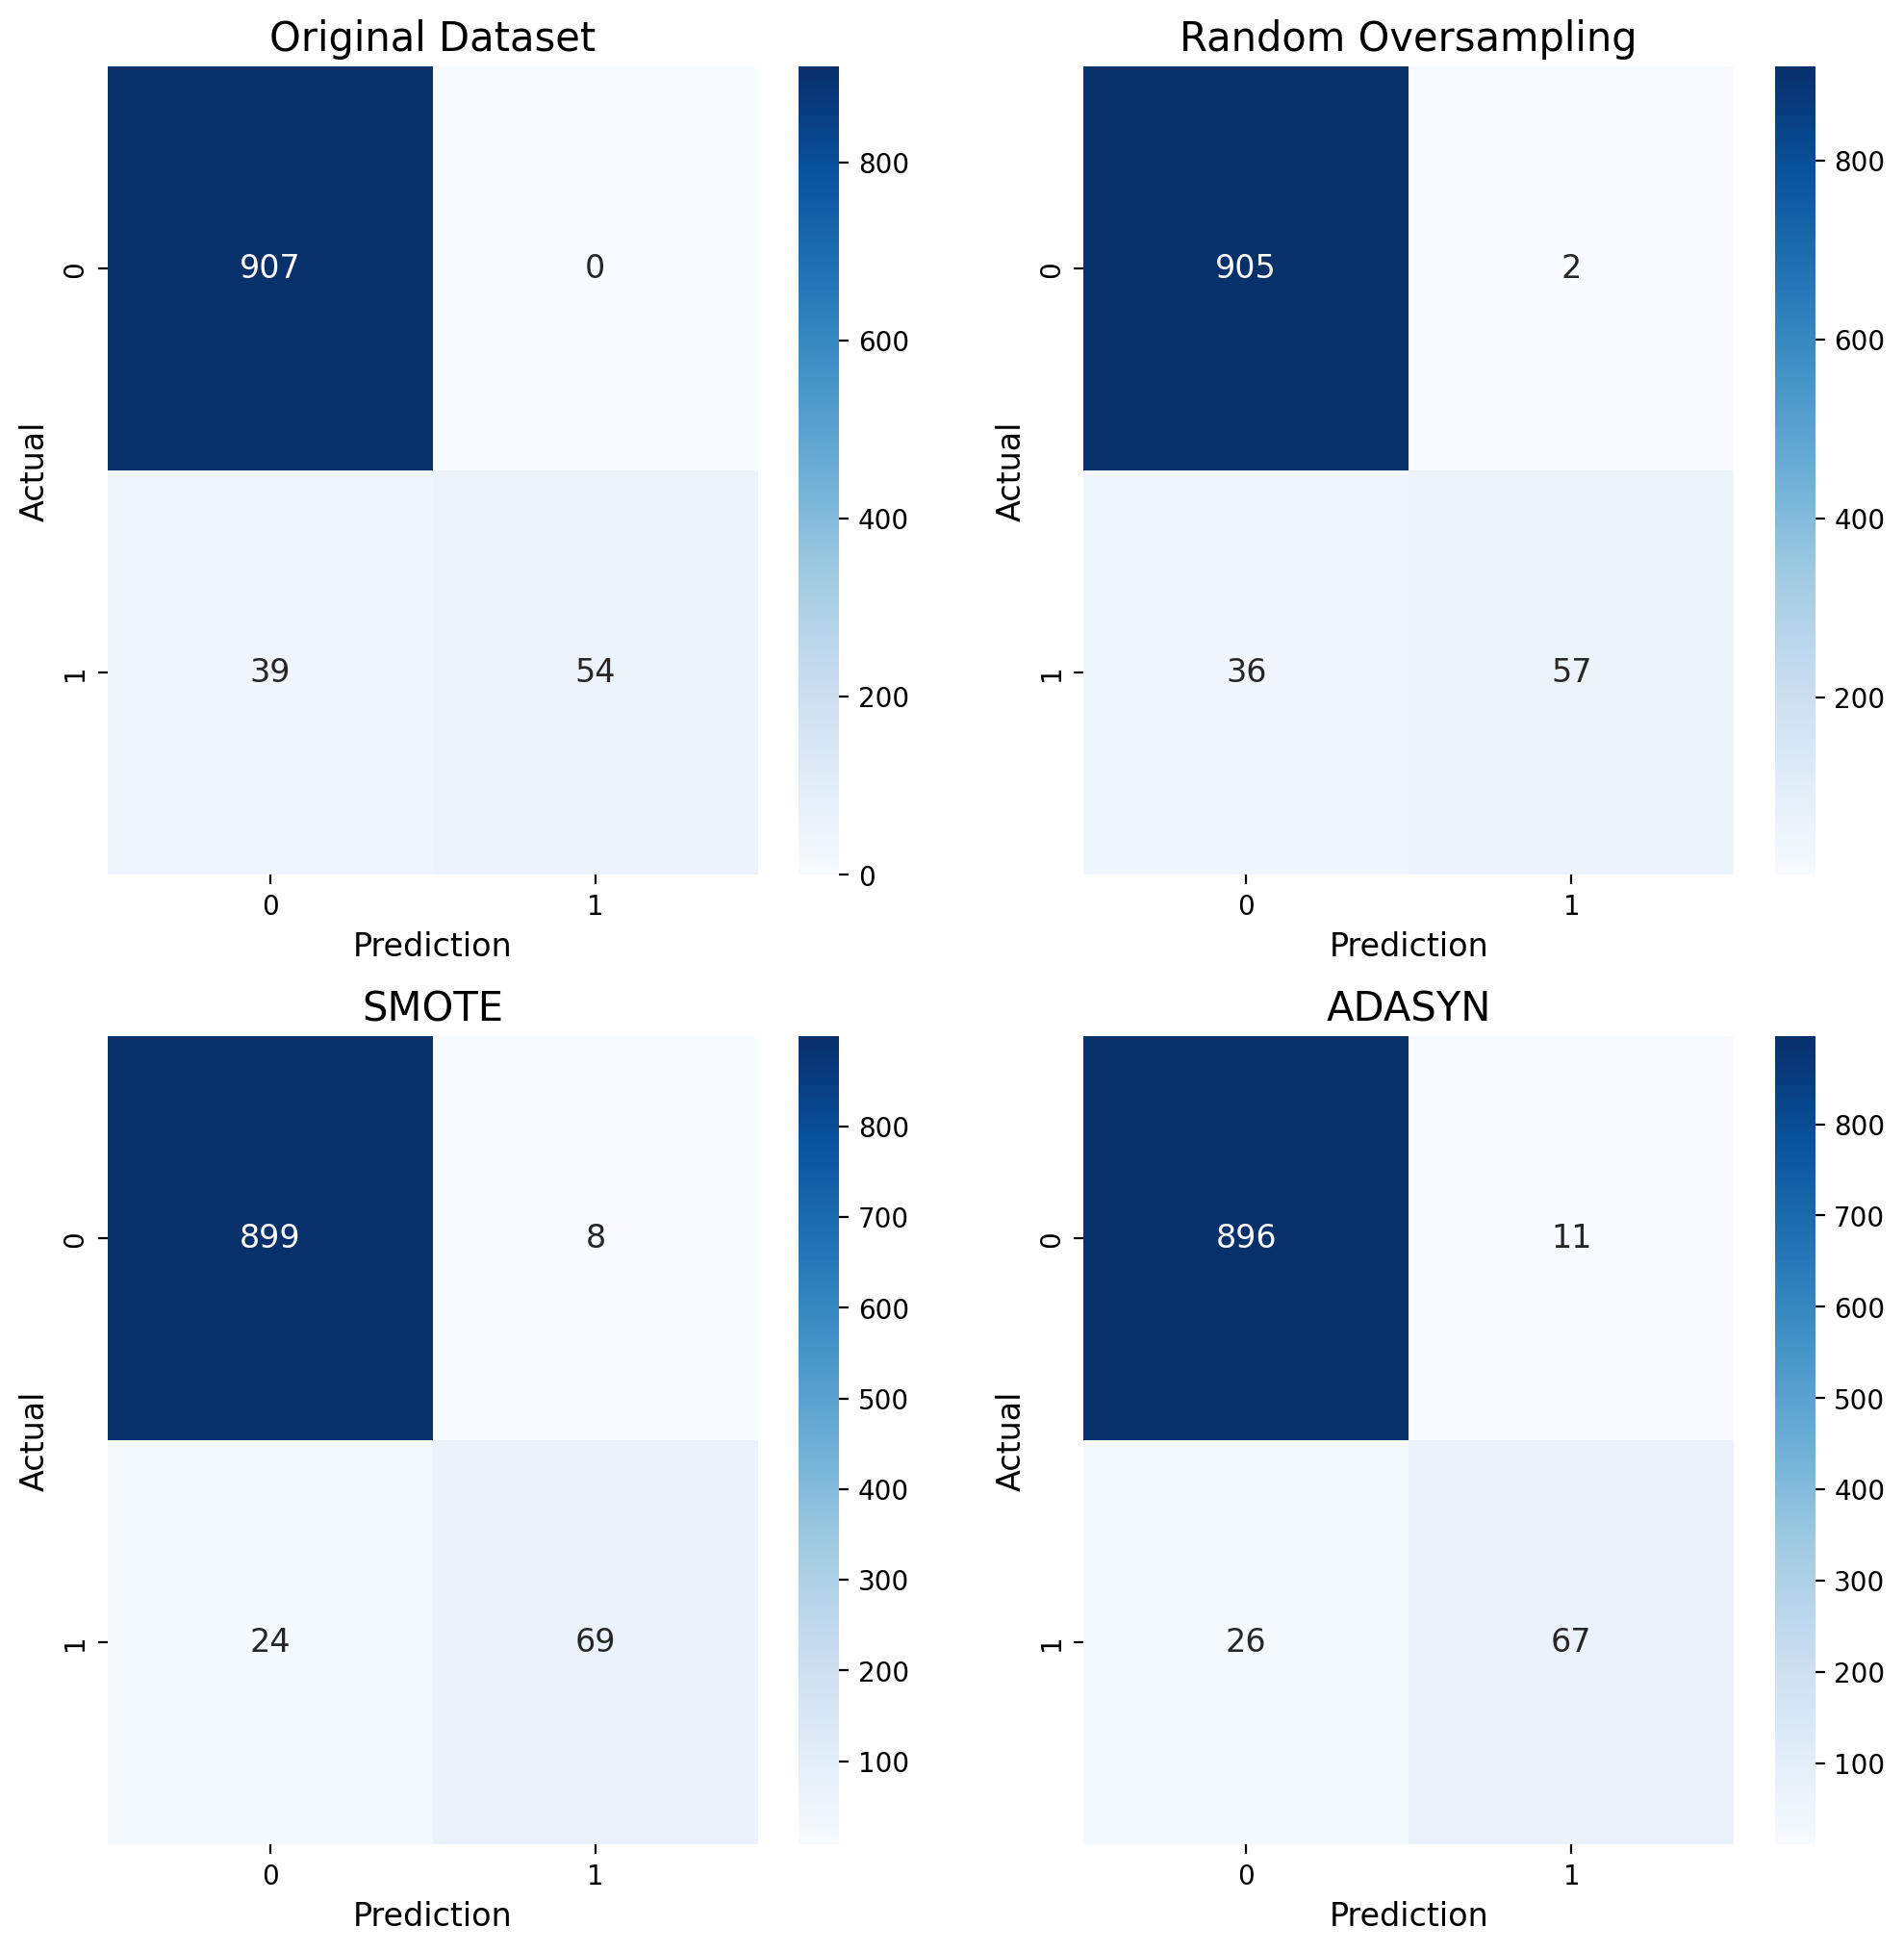

In [ ]:
ros = RandomOverSampler(random_state=333)
smote = SMOTE(random_state=333)
adasyn = ADASYN(random_state=333)

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Original dataset에 대해 학습
clf = RandomForestClassifier(random_state=333)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 다시 학습
clf = RandomForestClassifier(random_state=333)
clf.fit(X_train_ros, y_train_ros)
y_pred_ros = clf.predict(X_test)

clf = RandomForestClassifier(random_state=333)
clf.fit(X_train_smote, y_train_smote)
y_pred_smote = clf.predict(X_test)

clf = RandomForestClassifier(random_state=333)
clf.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = clf.predict(X_test)

print("\n🔹 Original dataset에 대한 예측모델 F1 score")
print(f1_score(y_test, y_pred))

print("\n🔹 Random Oversampling 적용 후 모델 F1 score")
print(f1_score(y_test, y_pred_ros))


print("\n🔹 Sythetic Minority Oversampling Technique (SMOTE) 적용 후 모델 F1 score")
print(f1_score(y_test, y_pred_smote))


print("\n🔹 Adaptive Synthetic Sampling 적용 후 모델 F1 score")
print(f1_score(y_test, y_pred_adasyn))

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=200)

sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[0][0], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[0][0].set_title("Original Dataset", fontsize=15)
axes[0][0].set_xlabel("Prediction", fontsize=12)
axes[0][0].set_ylabel("Actual", fontsize=12)
axes[0][0].xaxis.set_ticklabels(['0', '1'], size=10)
axes[0][0].yaxis.set_ticklabels(['0', '1'], size=10)

sns.heatmap(confusion_matrix(y_test, y_pred_ros), ax = axes[0][1], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[0][1].set_title("Random Oversampling", fontsize=15)
axes[0][1].set_xlabel("Prediction", fontsize=12)
axes[0][1].set_ylabel("Actual", fontsize=12)
axes[0][1].xaxis.set_ticklabels(['0', '1'], size=10)
axes[0][1].yaxis.set_ticklabels(['0', '1'], size=10)

sns.heatmap(confusion_matrix(y_test, y_pred_smote), ax = axes[1][0], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[1][0].set_title("SMOTE", fontsize=15)
axes[1][0].set_xlabel("Prediction", fontsize=12)
axes[1][0].set_ylabel("Actual", fontsize=12)
axes[1][0].xaxis.set_ticklabels(['0', '1'], size=10)
axes[1][0].yaxis.set_ticklabels(['0', '1'], size=10)

sns.heatmap(confusion_matrix(y_test, y_pred_adasyn), ax = axes[1][1], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[1][1].set_title("ADASYN", fontsize=15)
axes[1][1].set_xlabel("Prediction", fontsize=12)
axes[1][1].set_ylabel("Actual", fontsize=12)
axes[1][1].xaxis.set_ticklabels(['0', '1'], size=10)
axes[1][1].yaxis.set_ticklabels(['0', '1'], size=10)

# Combination of Over- and Under-sampling

<a href="https://ibb.co/bRQsHcgX"><img src="https://i.postimg.cc/cL1q4n7v/Hybrid.png" alt="Hybrid" border="0"></a>


🔹 Original dataset에 대한 예측모델 F1 score
0.7346938775510204

🔹 SMOTEENN 적용 후 모델 F1 score
0.797752808988764

🔹 SMOTETomek 적용 후 모델 F1 score
0.8165680473372781


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

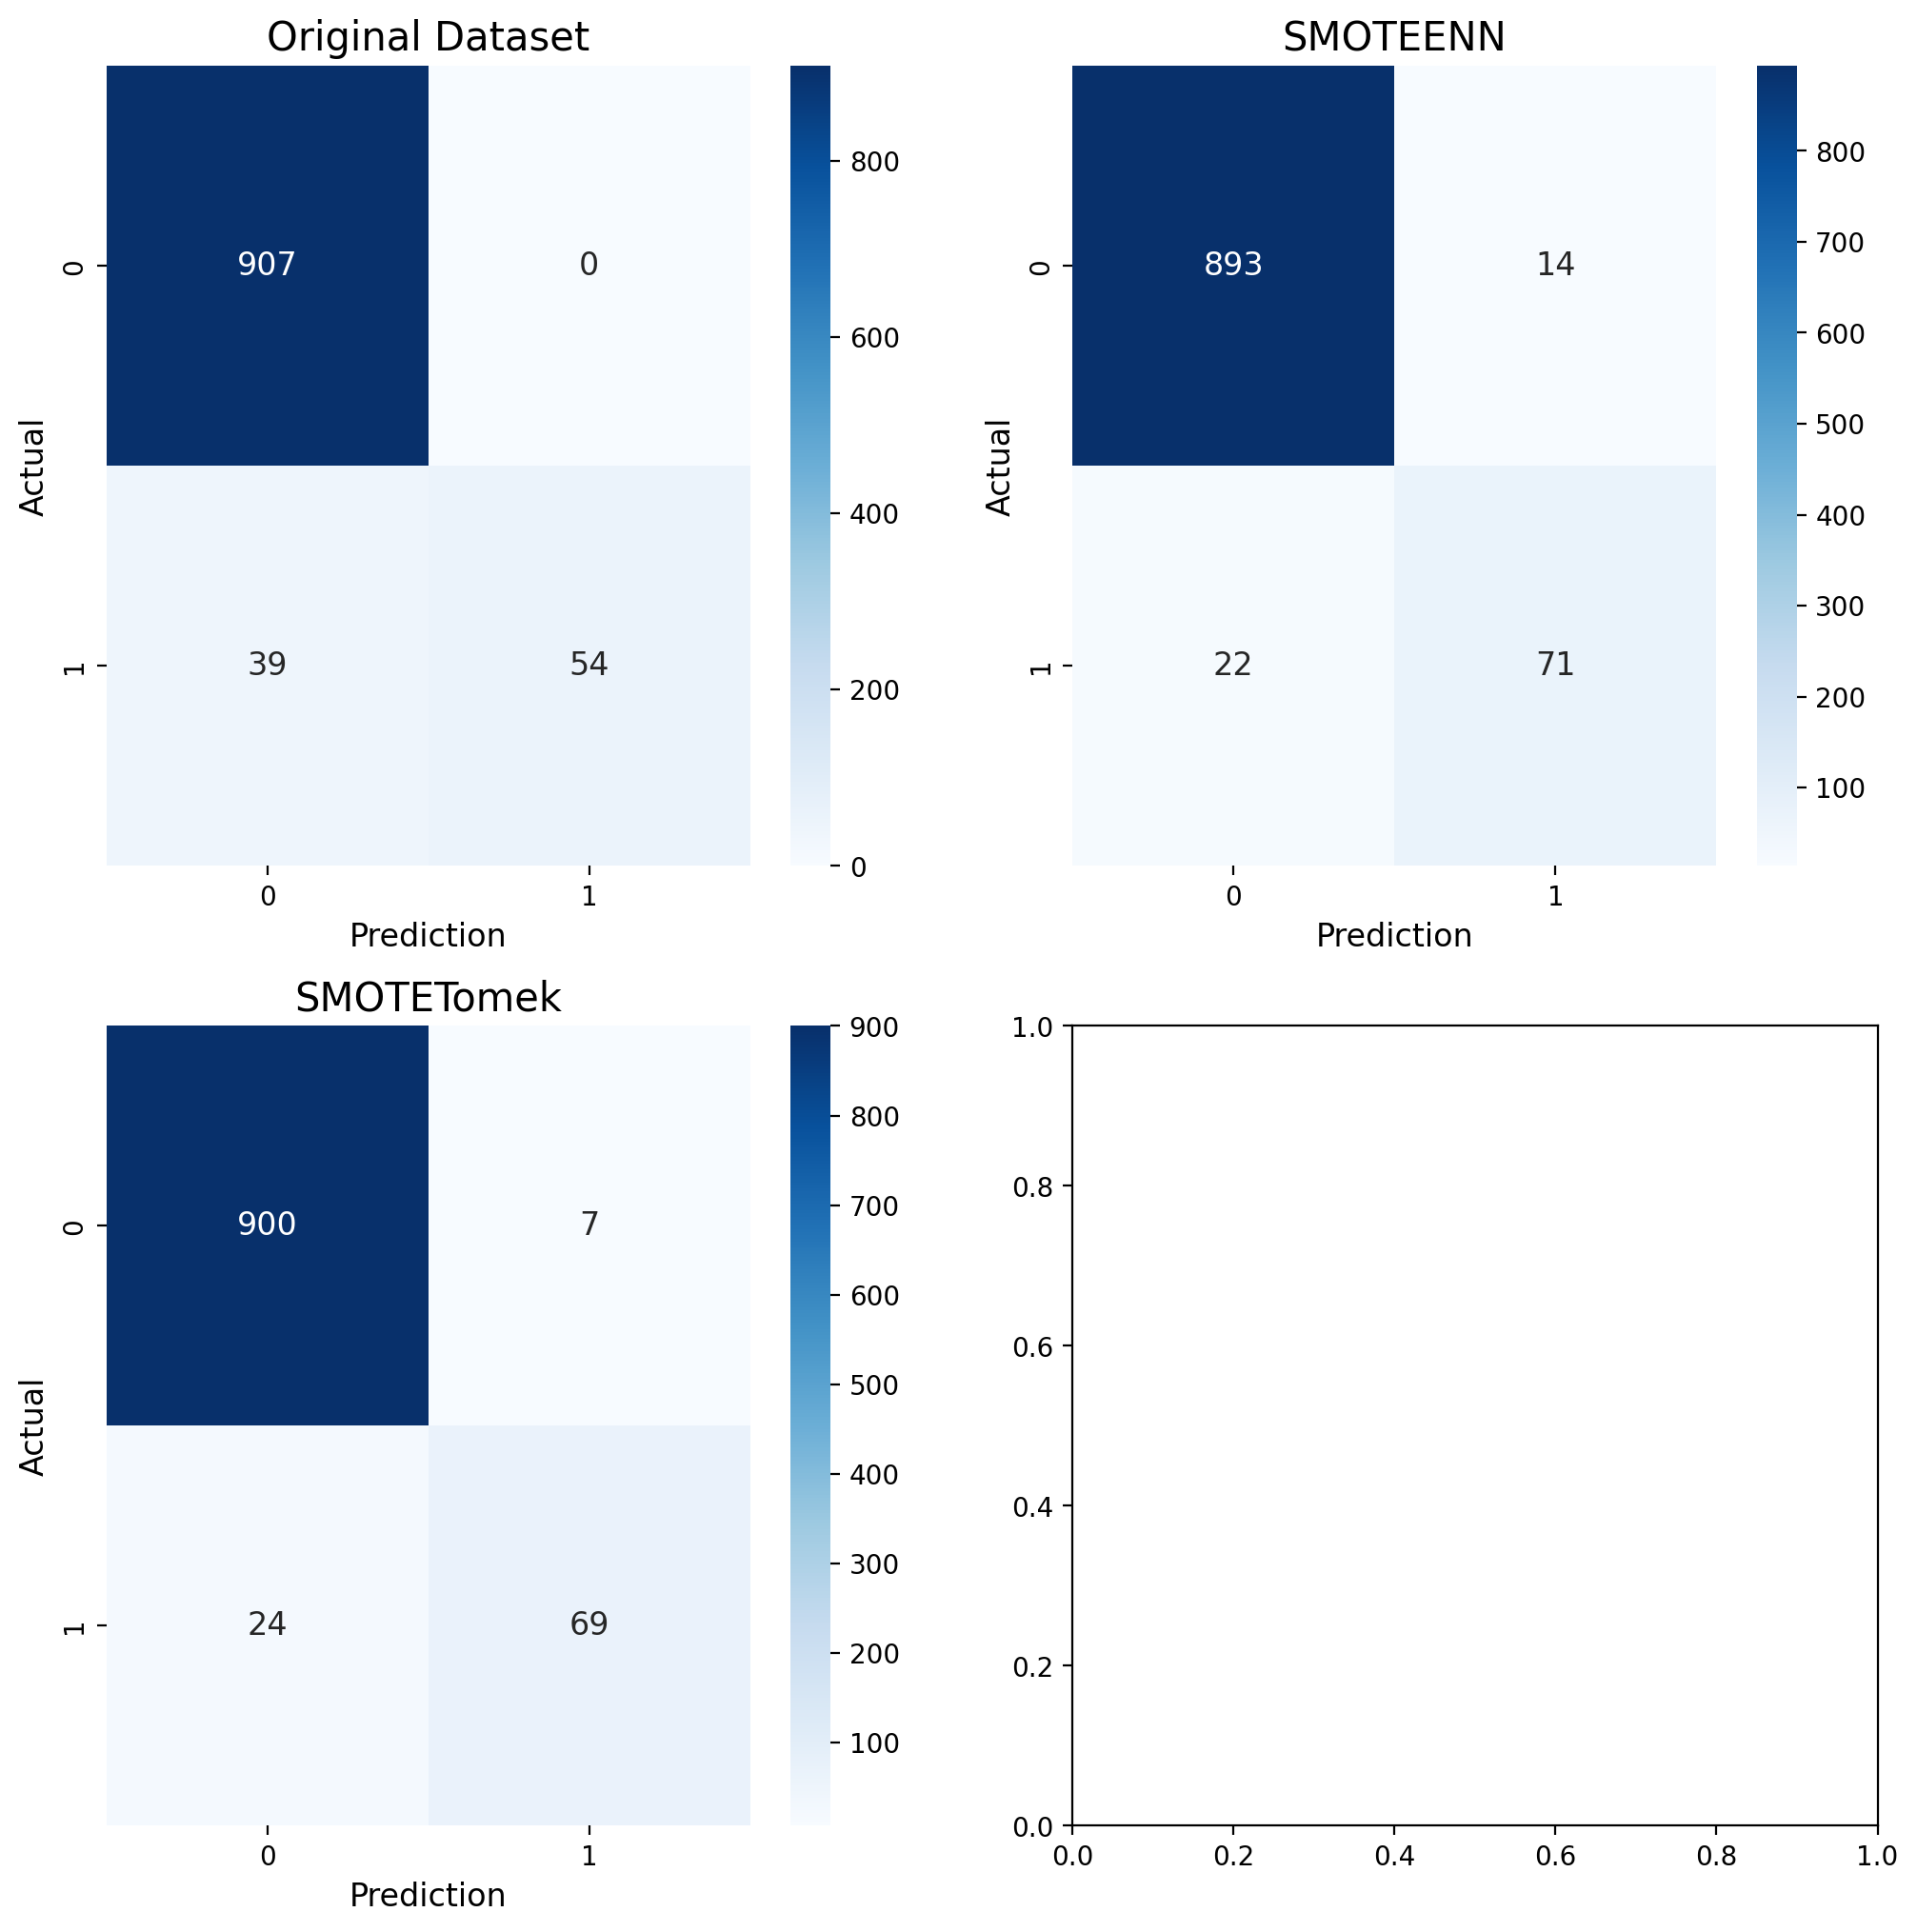

In [ ]:
smoteenn = SMOTEENN(random_state=333)
smotetomek = SMOTETomek(random_state=333)

X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

# Original dataset에 대해 학습
clf = RandomForestClassifier(random_state=333)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 다시 학습
clf = RandomForestClassifier(random_state=333)
clf.fit(X_train_smoteenn, y_train_smoteenn)
y_pred_smoteenn = clf.predict(X_test)

clf = RandomForestClassifier(random_state=333)
clf.fit(X_train_smotetomek, y_train_smotetomek)
y_pred_smotetomek = clf.predict(X_test)

print("\n🔹 Original dataset에 대한 예측모델 F1 score")
print(f1_score(y_test, y_pred))

print("\n🔹 SMOTEENN 적용 후 모델 F1 score")
print(f1_score(y_test, y_pred_smoteenn))

print("\n🔹 SMOTETomek 적용 후 모델 F1 score")
print(f1_score(y_test, y_pred_smotetomek))

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=200)

sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[0][0], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[0][0].set_title("Original Dataset", fontsize=15)
axes[0][0].set_xlabel("Prediction", fontsize=12)
axes[0][0].set_ylabel("Actual", fontsize=12)
axes[0][0].xaxis.set_ticklabels(['0', '1'], size=10)
axes[0][0].yaxis.set_ticklabels(['0', '1'], size=10)

sns.heatmap(confusion_matrix(y_test, y_pred_smoteenn), ax = axes[0][1], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[0][1].set_title("SMOTEENN", fontsize=15)
axes[0][1].set_xlabel("Prediction", fontsize=12)
axes[0][1].set_ylabel("Actual", fontsize=12)
axes[0][1].xaxis.set_ticklabels(['0', '1'], size=10)
axes[0][1].yaxis.set_ticklabels(['0', '1'], size=10)

sns.heatmap(confusion_matrix(y_test, y_pred_smotetomek), ax = axes[1][0], annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12})  # 폰트 크기 줄이기
axes[1][0].set_title("SMOTETomek", fontsize=15)
axes[1][0].set_xlabel("Prediction", fontsize=12)
axes[1][0].set_ylabel("Actual", fontsize=12)
axes[1][0].xaxis.set_ticklabels(['0', '1'], size=10)
axes[1][0].yaxis.set_ticklabels(['0', '1'], size=10)
